In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file1 = 'top_songs.csv'
file2 = 'genre_df.csv'

top_df = pd.read_csv(file1)
song_df = pd.read_csv(file2)
top_df = top_df.drop_duplicates(subset='SongID', keep='last')
top_df = top_df.rename(columns={'Performer':'Artist'})
combined_df = song_df.merge(top_df, on=['Song', 'Artist'])
top_df.head()

,url,WeekID,Week Position,Song,Artist,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
20,http://www.billboard.com/charts/hot-100/1990-0...,6/30/1990,89,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,76.0,2,21
35,http://www.billboard.com/charts/hot-100/2011-0...,9/10/2011,87,Don't Wanna Go Home,Jason Derulo,Don't Wanna Go HomeJason Derulo,1,74.0,14,15
62,http://www.billboard.com/charts/hot-100/2017-0...,4/29/2017,46,Don't Wanna Know,Maroon 5 Featuring Kendrick Lamar,Don't Wanna KnowMaroon 5 Featuring Kendrick Lamar,1,45.0,6,27
69,http://www.billboard.com/charts/hot-100/1971-1...,12/4/1971,64,Don't Wanna Live Inside Myself,Bee Gees,Don't Wanna Live Inside MyselfBee Gees,1,55.0,53,7
87,http://www.billboard.com/charts/hot-100/1989-1...,11/4/1989,84,Don't Wanna Lose You,Gloria Estefan,Don't Wanna Lose YouGloria Estefan,1,60.0,1,18


In [3]:
combined_df = combined_df[['Song', 'Artist', 'Chord Progression', 'Genre', 'Popularity', 'Peak Position', 'Weeks on Chart']]
combined_df.head()


,Song,Artist,Chord Progression,Genre,Popularity,Peak Position,Weeks on Chart
0,The Bad Touch,Bloodhound Gang,"1,5,4,6",rock,71.0,55,4
1,The Bad Touch,Bloodhound Gang,"1,5,4,6",alternative,71.0,55,4
2,The Bad Touch,Bloodhound Gang,"1,5,4,6",dance,71.0,55,4
3,The Bad Touch,Bloodhound Gang,"1,5,4,6",alternative rock,71.0,55,4
4,The Bad Touch,Bloodhound Gang,"1,5,4,6",comedy,71.0,55,4


In [4]:
grouped = combined_df.groupby('Chord Progression')

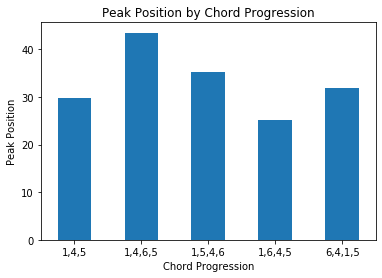

In [5]:
m = grouped['Peak Position'].mean()
m.plot.bar()
plt.ylabel('Peak Position')
plt.title('Peak Position by Chord Progression')
plt.xticks(rotation=0)
plt.savefig('peakposition.png')

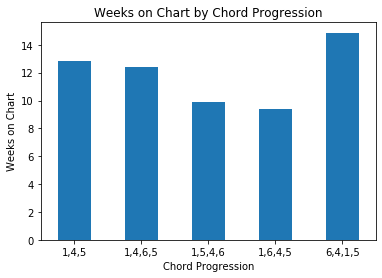

In [9]:
m = grouped['Weeks on Chart'].mean()
m.plot.bar()
plt.ylabel('Weeks on Chart')
plt.title('Weeks on Chart by Chord Progression')
plt.xticks(rotation=0)
plt.savefig('weeksonchart.png')

In [7]:
genres = ['pop', 'rock', '80s', 'dance', 'alternative']
genre_counts = []
for g in genres:
    c = combined_df[combined_df['Genre']==g]['Chord Progression'].value_counts()
    genre_counts.append(c)

pop
rock
80s
dance
alternative


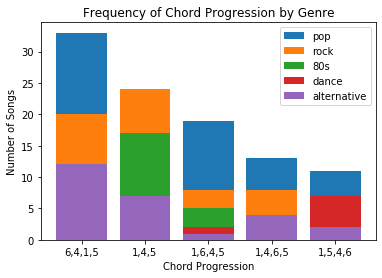

In [8]:
progressions = ['1,5,4,6', '1,4,5', '1,4,6,5', '6,4,1,5', '1,6,4,5']
for i in range(0, len(genres)):
    plt.bar(genre_counts[i].index, genre_counts[i], label=genres[i])
    print(genres[i])

plt.legend()
plt.title('Frequency of Chord Progression by Genre')
plt.xlabel('Chord Progression')
plt.ylabel('Number of Songs')
plt.savefig('genrecp.png')